<a href="https://colab.research.google.com/github/Arthurads-rj/portfolio-data-science/blob/main/An%C3%A1lise%20de%20Vendas%20nos%20EUA/Analise_de_vendas_nos_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Vendas
Nessa análise, iremos visualizar dados retirados de uma empresa chamada Superstore Giant.
Meu intuito com essa análise é providenciar insights de negócio e mercado que podem ajudar a empresa a crescer mais.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dados = pd.read_csv('../content/drive/MyDrive/Planilhas/Sample - Superstore.csv', encoding='windows-1252', index_col='Row ID')

## Explicações
Neste Dataframe existem 20 colunas, porém os nomes das colunas estão em inglês. Traduzindo os nomes ficam:


* Order ID: Id de Encomenda
* Order Date: Data de Encomenda
* Ship Date: Data de envio
* Customer ID: Id de Cliente
* Customer Name: Nome do Cliente
* Segment: Segmento
* Country: País
* City: Cidade
* State: Estado
* Postal Code: Codigo Postal
* Region: Região
* Product ID: ID de Produto
* Category: Categoria
* Sub-Category: Sub-Categoria
* Product Name: Nome do Produto
* Sales: Vendas
* Quantity: Quantidade
* Discount: Desconto
* Profit: Lucro

Segmento seria como uma classificação de clientes, dizendo se o cliente é um consumidor comum (Consumer), uma corporação (Corporate) ou uma compra home office



## Tratamento de dados
Inicialmente quis observar como está o DataFrame com um `head()`

In [4]:
dados.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
print(f'Total de Linhas e Colunas: {dados.shape}')

Total de Linhas e Colunas: (9994, 20)


Depois de visualizar o total de linhas e colunas da tabela, usei o comando `info()` para ver quais os tipos de dados (DTypes) e se tinham dados faltando.

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

Só para confirmar, fiz a soma de todos os dados faltando, mas não tem nenhuma entrada nula.

In [7]:
dados.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Em seguida, fiz um print dos valores únicos das categorias, sub-categorias e do nome dos produtos.
Os nomes não são tão relevantes porque são muitos nomes.

In [8]:
print(np.unique(dados['Category'], return_counts=True))
print(np.unique(dados['Sub-Category'], return_counts=True))
print(np.unique(dados['Product Name'], return_counts=True))

(array(['Furniture', 'Office Supplies', 'Technology'], dtype=object), array([2121, 6026, 1847]))
(array(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases',
       'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings',
       'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies',
       'Tables'], dtype=object), array([ 775,  466,  796, 1523,  228,  617,   68,  254,  217,  957,  364,
        115, 1370,  889,  846,  190,  319]))
(array(['"While you Were Out" Message Book, One Form per Page',
       '#10 Gummed Flap White Envelopes, 100/Box',
       '#10 Self-Seal White Envelopes', ..., 'iOttie XL Car Mount',
       'invisibleSHIELD by ZAGG Smudge-Free Screen Protector',
       'netTALK DUO VoIP Telephone Service'], dtype=object), array([3, 4, 4, ..., 2, 7, 7]))


O maior número de vezes que um nome se repete é 48 vezes.

In [9]:
dados['Product Name'].value_counts()

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                  1
Name: Prod

Usei o `describe()` para ver coisas como contagem, média, mínima e máxima e mediana das colunas que comportam números.

In [10]:
dados.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Depois, fui ver se as colunas com datas eram do dtype Datetime

In [11]:
print(type(dados['Ship Date'].iloc[0]))
print(type(dados['Order Date'].iloc[0]))

<class 'str'>
<class 'str'>


E não são, então precisei tratar as colunas.

In [12]:
dados['Ship Date'] = pd.to_datetime(dados['Ship Date'])
dados['Order Date'] = pd.to_datetime(dados['Order Date'])

print(type(dados['Ship Date'].iloc[0]))
print(type(dados['Order Date'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [13]:
dados.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Pedi os valores únicos da coluna de Estados apenas para ter certeza se todos estavam.

In [14]:
print(dados['State'].unique())
print(dados['State'].nunique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
49


In [15]:
print(np.unique(dados['Segment'], return_counts=True))

(array(['Consumer', 'Corporate', 'Home Office'], dtype=object), array([5191, 3020, 1783]))


##Análise Exploratória

Iniciei agrupando os Estados as suas vendas pois eu tinha uma pergunta em mente:
**Quais são os Estados com a maior quantidade de vendas e lucro?**

In [16]:
dados_agrup = dados.groupby('State')[['Sales']].sum().sort_values(by='Sales', ascending=False).reset_index()
dados_agrup

,State,Sales
0,California,457687.6315
1,New York,310876.2710
2,Texas,170188.0458
3,Washington,138641.2700
4,Pennsylvania,116511.9140
5,Florida,89473.7080
6,Illinois,80166.1010
7,Ohio,78258.1360
8,Michigan,76269.6140
9,Virginia,70636.7200


E em seguida fiz um gráfico para facilitar a visualização das informações

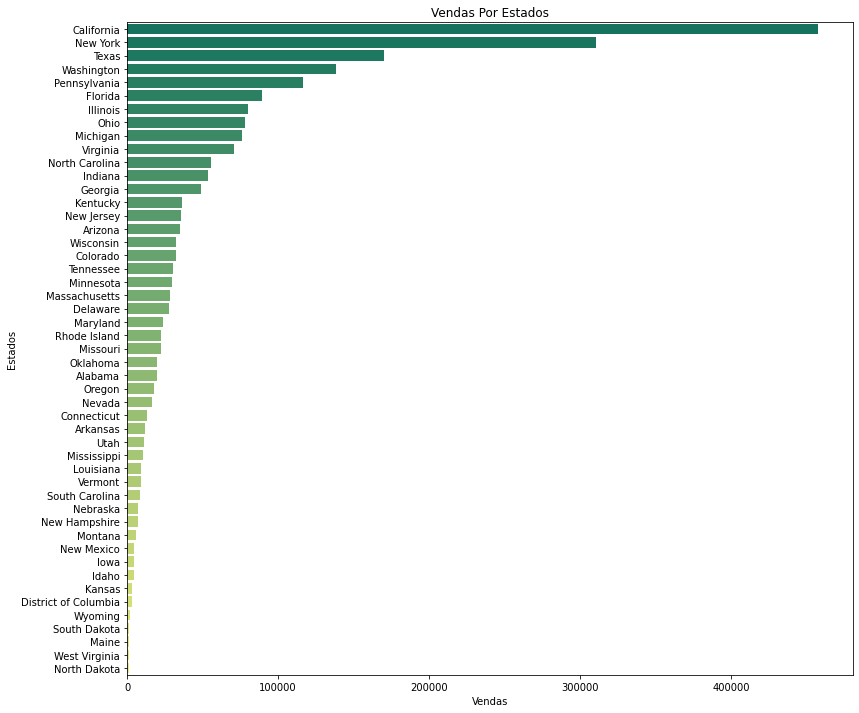

In [17]:
plt.figure(figsize=(13,12))
g = sns.barplot(data=dados_agrup, x='Sales', y='State', palette='summer')
g.set_title('Vendas Por Estados')
g.set_xlabel('Vendas')
g.set_ylabel('Estados')
plt.show(g)

California é um dos Estados com maior número de vendas, seguido de Nova Iorque e Texas.

Em seguida, fui conferir os lucros dos Estados.

In [18]:
dados_agrup_lucro = dados.groupby('State')[['Profit']].sum().sort_values(by='Profit', ascending=False).reset_index()
dados_agrup_lucro

,State,Profit
0,California,76381.3871
1,New York,74038.5486
2,Washington,33402.6517
3,Michigan,24463.1876
4,Virginia,18597.9504
5,Indiana,18382.9363
6,Georgia,16250.0433
7,Kentucky,11199.6966
8,Minnesota,10823.1874
9,Delaware,9977.3748


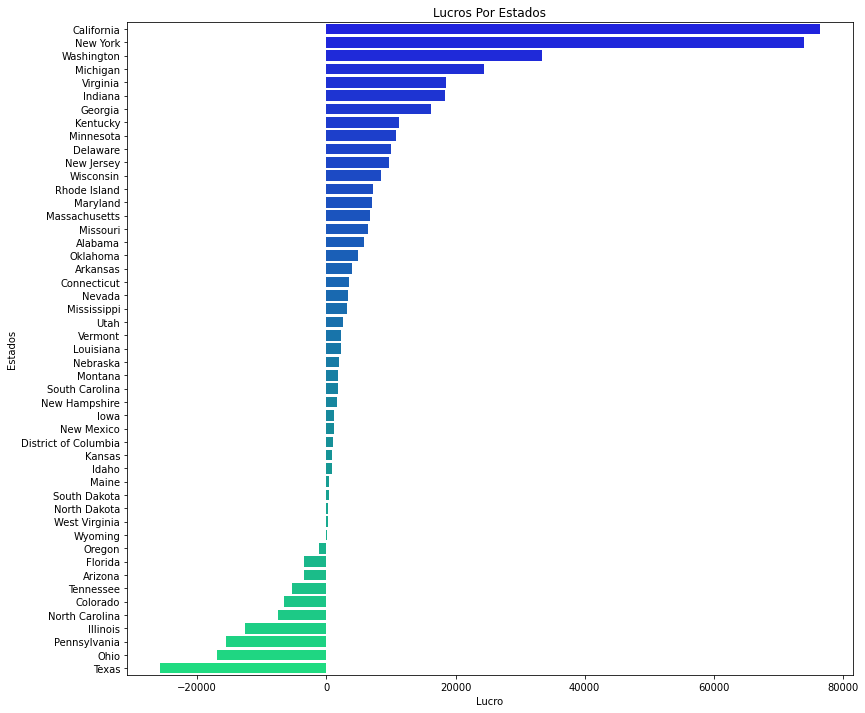

In [19]:
plt.figure(figsize=(13,12))
g = sns.barplot(data=dados_agrup_lucro, x='Profit', y='State', palette='winter')
g.set_title('Lucros Por Estados')
g.set_xlabel('Lucro')
g.set_ylabel('Estados')
plt.show(g)

California e Nova Iorque seguem no topo, gerando uma boa quantidade de lucros para a empresa. Mas tem um problema, aparentemente Texas está dando muito prejuízo.

In [20]:
dados_tex = dados.loc[dados['State'] == 'Texas']
dados_tex_prej = dados_agrup_lucro[-1:]
print(dados_tex_prej['Profit']/dados_tex.shape[0])

48   -26.121174
Name: Profit, dtype: float64


In [21]:
dados_tex.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,985.000000,985.000000,985.000000,985.000000,985.000000
mean,76901.211168,172.779742,3.780711,0.370193,-26.121174
std,1251.940629,424.447771,2.158043,0.243362,189.022781
min,75002.000000,0.444000,1.000000,0.200000,-3701.892800
25%,76017.000000,10.824000,2.000000,0.200000,-17.027400
50%,77041.000000,36.288000,3.000000,0.200000,0.333600
75%,77506.000000,158.376000,5.000000,0.600000,6.998600
max,79907.000000,8159.952000,14.000000,0.800000,624.987500


Texas tem um total de 26% de prejuízo. Talvez isso aconteça por conta da grande quantidade de descontos oferecidos. o `describe()` sugere que Texas sempre oferece descontos.

Um pouco chocante pensar que um dos Estados que tem grandes vendas também tem um alto prejuízo.

Abaixo eu fiz uma divisão da coluna de segmentos, para conseguir ver quais os segmentos que derão mais vendas e lucros.



In [22]:
#agrupei os dados
dados_agrup_vendas = dados.groupby(['State', 'Segment']).agg({'Sales':'sum'}).reset_index()
#usei a função pivot para tornar os valores da coluna 'Segment' em colunas
dados_agrup_vendas = dados_agrup_vendas.pivot(index='State', columns='Segment', values='Sales').reset_index()
#criei uma coluna chamada 'Total' para somar todos os valores de venda dos segmentos em 1 só para organizar a tabela
dados_agrup_vendas['Total'] = dados_agrup_vendas['Consumer'] + dados_agrup_vendas['Corporate'] + dados_agrup_vendas['Home Office']
dados_agrup_vendas = dados_agrup_vendas.sort_values(by='Total', ascending=False)
dados_agrup_vendas.drop(columns='Total', inplace=True)

dados_agrup_vendas.head()

Segment,State,Consumer,Corporate,Home Office
3,California,229636.080,147174.7265,80876.825
30,New York,175209.035,77951.3130,57715.923
41,Texas,95976.378,53908.1198,20303.548
45,Washington,73866.520,39727.1100,25047.640
36,Pennsylvania,66899.293,31130.0610,18482.560


Text(0.5, 0, 'Estados')

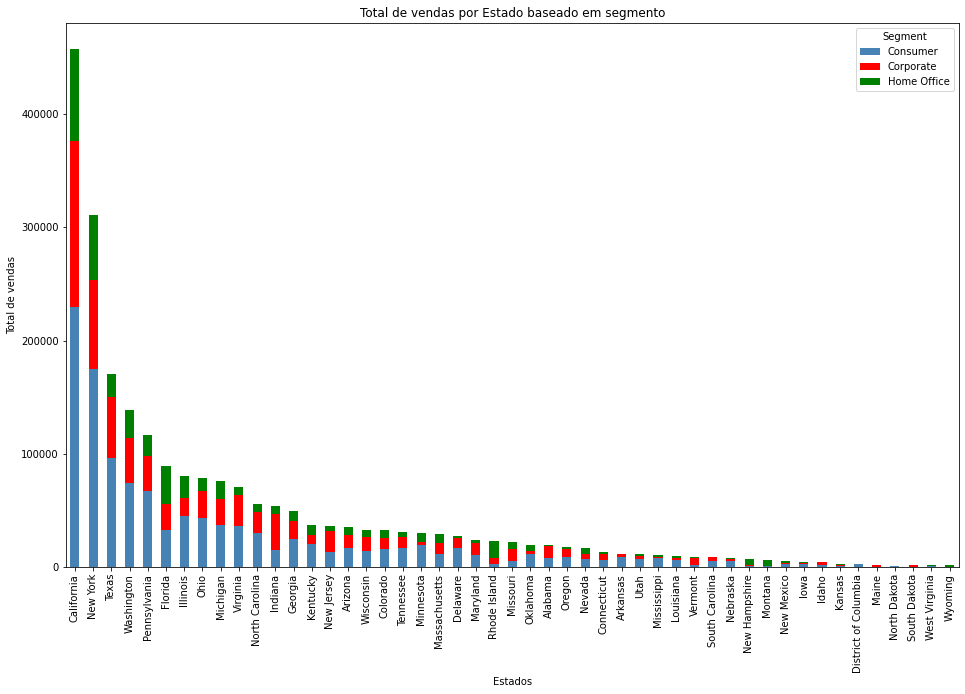

In [23]:
dados_agrup_vendas.set_index('State').plot(kind='bar', stacked=True, color=['steelblue', 'red', 'green'], figsize=(16, 10))
plt.title('Total de vendas por Estado baseado em segmento')
plt.ylabel('Total de vendas')
plt.xlabel('Estados')

In [24]:
#fiz o mesmo que na tabela de dados de vendas, agrupei os dados, tornei os valores de 'Segment' em colunas
#e depois organizei usando a coluna 'Total' que criei.
dados_agrup_lucro = dados.groupby(['State', 'Segment']).agg({'Profit':'sum'}).reset_index()
dados_agrup_lucro = dados_agrup_lucro.pivot(index='State', columns='Segment', values='Profit').reset_index()
dados_agrup_lucro['Total'] = dados_agrup_lucro['Consumer'] + dados_agrup_lucro['Corporate'] + dados_agrup_lucro['Home Office']
dados_agrup_lucro = dados_agrup_lucro.sort_values(by='Total', ascending=False)
dados_agrup_lucro.drop(columns='Total', inplace=True)

dados_agrup_lucro.head()

Segment,State,Consumer,Corporate,Home Office
3,California,38374.0392,24367.8441,13639.5038
30,New York,39640.5183,16524.5481,17873.4822
45,Washington,19817.3052,9295.9113,4289.4352
20,Michigan,12950.5232,5816.5265,5696.1379
44,Virginia,9526.8628,7308.4774,1762.6102


Text(0.5, 0, 'Estados')

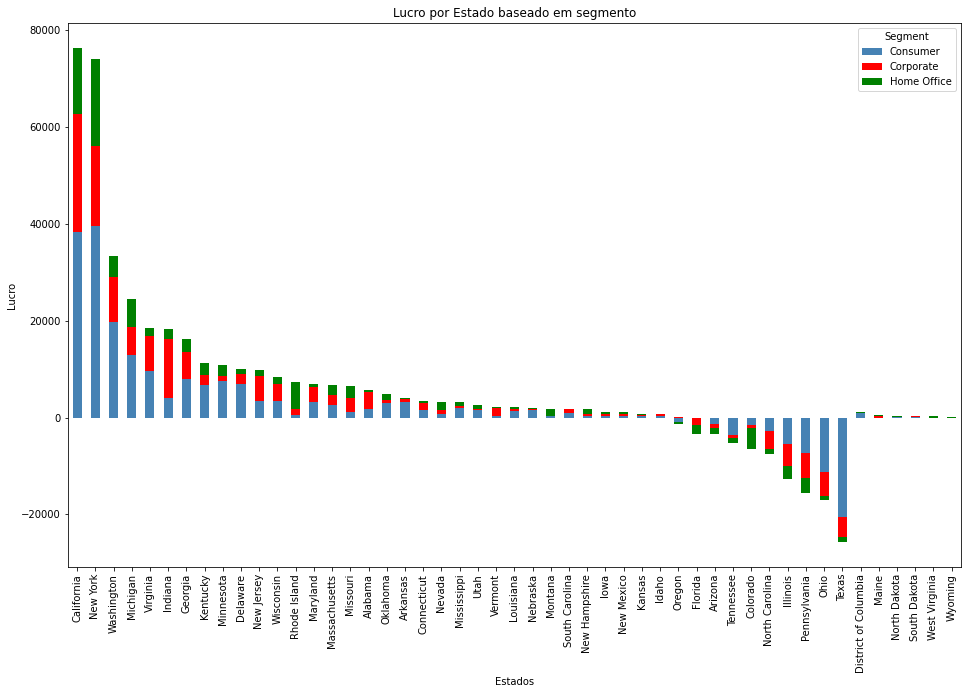

In [25]:
dados_agrup_lucro.set_index('State').plot(kind='bar', stacked=True, color=['steelblue', 'red', 'green'], figsize=(16, 10))
plt.title('Lucro por Estado baseado em segmento')
plt.ylabel('Lucro')
plt.xlabel('Estados')

Abaixo, eu fui examinar as categorias de produtos para saber quais são as categorias de produtos e quantos foram vendidos.

In [26]:
dados['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [27]:
#fiz o mesmo procedimento aqui também.
dados_agrup_categ = dados.groupby(['State', 'Category']).agg({'Sales':'sum'}).reset_index()
dados_agrup_categ = dados_agrup_categ.pivot(index='State', columns='Category', values='Sales').reset_index()
dados_agrup_categ['Total'] = dados_agrup_categ['Furniture'] + dados_agrup_categ['Technology'] + dados_agrup_categ['Office Supplies']
dados_agrup_categ = dados_agrup_categ.sort_values(by='Total', ascending=False)
dados_agrup_categ.drop(columns='Total', inplace=True)

dados_agrup_categ.head()

Category,State,Furniture,Office Supplies,Technology
3,California,156064.6015,142351.948,159271.082
30,New York,93372.7290,90020.042,127483.500
41,Texas,60593.2918,44490.530,65104.224
45,Washington,48020.1520,40084.408,50536.710
36,Pennsylvania,39354.9310,34941.714,42215.269


Text(0.5, 0, 'Estados')

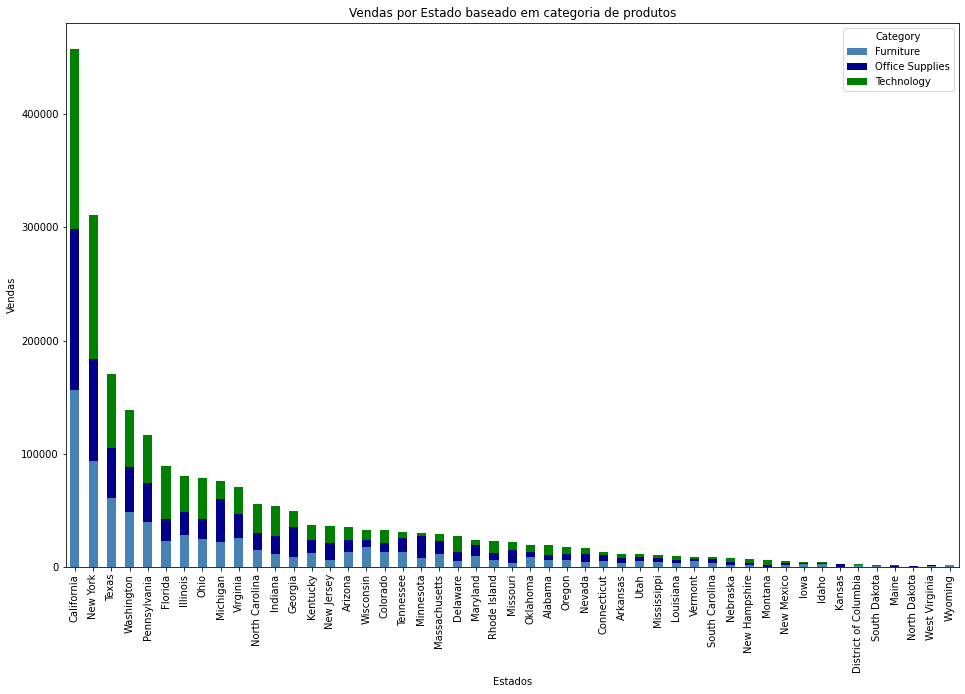

In [28]:
dados_agrup_categ.set_index('State').plot(kind='bar', stacked=True, color=['steelblue', 'darkblue', 'green'], figsize=(16, 10))
plt.title('Vendas por Estado baseado em categoria de produtos')
plt.ylabel('Vendas')
plt.xlabel('Estados')

No caso da California, os 3 tipos de produtos estão bem equilibrados, mas produtos relacionados a tecnologia parecem estar sobressaindo na maioria dos Estados.

In [29]:
dados_agrup_categ = dados.groupby(['State', 'Category']).agg({'Profit':'sum'}).reset_index()
dados_agrup_categ = dados_agrup_categ.pivot(index='State', columns='Category', values='Profit').reset_index()
dados_agrup_categ['Total'] = dados_agrup_categ['Furniture'] + dados_agrup_categ['Technology'] + dados_agrup_categ['Office Supplies']
dados_agrup_categ = dados_agrup_categ.sort_values(by='Total', ascending=False)
dados_agrup_categ.drop(columns='Total', inplace=True)

dados_agrup_categ.head()

Category,State,Furniture,Office Supplies,Technology
3,California,9162.9656,37748.3847,29470.0368
30,New York,5857.6801,25994.0829,42186.7856
45,Washington,7193.7850,11189.5232,15019.3435
20,Michigan,4675.5516,15005.3335,4782.3025
44,Virginia,5204.3265,5985.8695,7407.7544


Text(0.5, 0, 'Estados')

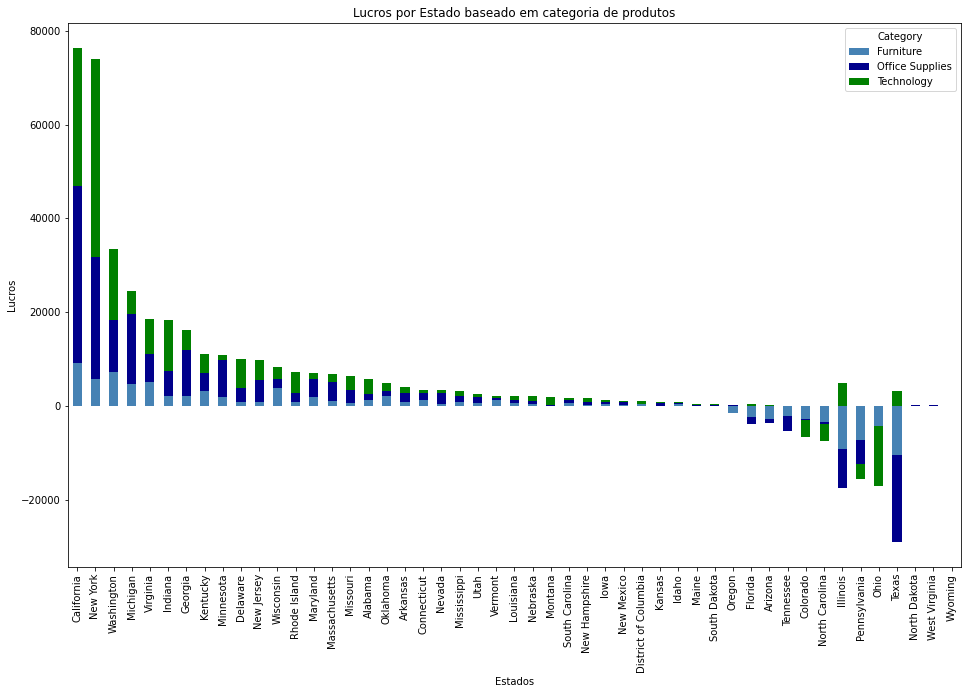

In [43]:
dados_agrup_categ.set_index('State').plot(kind='bar', stacked=True, color=['steelblue', 'darkblue', 'green'], figsize=(16, 10))
plt.title('Lucros por Estado baseado em categoria de produtos')
plt.ylabel('Lucros')
plt.xlabel('Estados')

Texas apresenta um problema de prejuízo com suprimentos de escritório (Office supplies) e móveis (Furniture), mas tecnologia deu um certo lucro.

Vimos que a California está no topo com relação a vendas e lucro. Vamos dar uma olhada mais de perto nos produtos vendidos na california.

In [30]:
dados_cal = dados.loc[dados['State'] == 'California']
dados_cal

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,California,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932


In [31]:
dados_cal_agrup_sub = dados_cal.groupby('Sub-Category')[['Sales']].sum().sort_values(by='Sales', ascending=False).reset_index()
dados_cal_agrup_sub

,Sub-Category,Sales
0,Phones,67964.5360
1,Chairs,63079.3680
2,Tables,45430.2320
3,Storage,45112.2900
4,Accessories,37255.0100
5,Machines,29492.0160
6,Binders,28473.1680
7,Bookcases,27558.5215
8,Copiers,24559.5200
9,Appliances,24175.9200


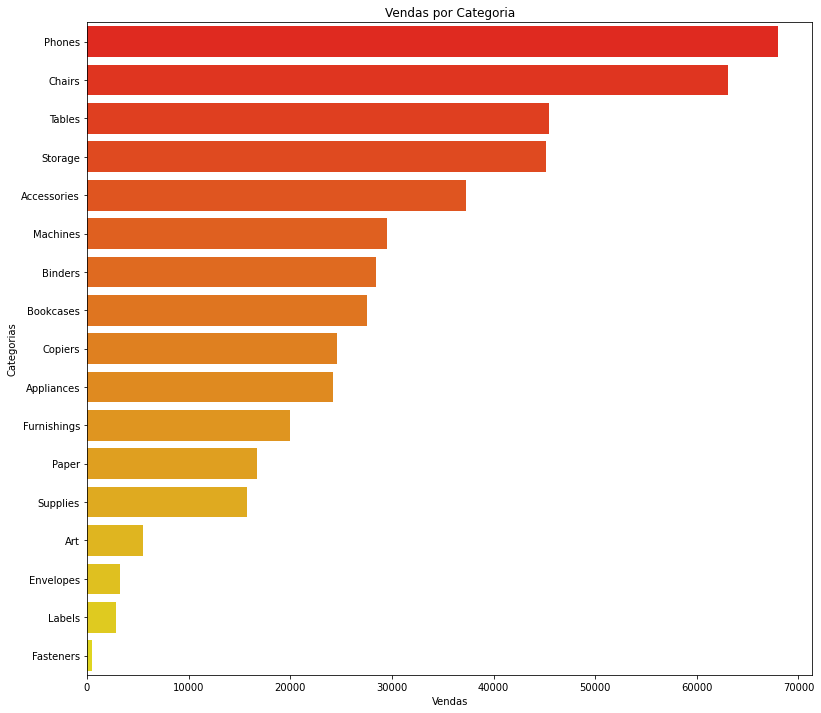

In [32]:
plt.figure(figsize=(13,12))
g = sns.barplot(data=dados_cal_agrup_sub, x='Sales', y='Sub-Category', palette='autumn')
g.set_title('Vendas por Categoria')
g.set_xlabel('Vendas')
g.set_ylabel('Categorias')
plt.show(g)

Como visto anteriormente, as maiores vendas da California são de tecnologia e mobília. Cadeiras, celulares e mesas são os produtos que mais tem vendas.

Seria ideal filtrar os Estados para saber quais são os que carregam a maior porcentagem de venda. Usando uma quantidade específica de dados e dividindo pela quantidade de linhas no DataFrame, pude descobrir a resposta para isso.

In [33]:
#transforma os Estados organizados por maior número de vendas em lista
top10_estados = dados_agrup['State'].tolist()[:10]
top15_estados = dados_agrup['State'].tolist()[:15]
top20_estados = dados_agrup['State'].tolist()[:20]

print(f'Porcentagem de vendas dos top 10 Estados: {round(dados[dados["State"].isin(top10_estados)].count()[0] / dados.count()[0], 4)*100}%')
print(f'Porcentagem de vendas dos top 15 Estados: {round(dados[dados["State"].isin(top15_estados)].count()[0] / dados.count()[0], 4)*100}%')
print(f'Porcentagem de vendas dos top 20 Estados: {round(dados[dados["State"].isin(top20_estados)].count()[0] / dados.count()[0], 4)*100}%')

Porcentagem de vendas dos top 10 Estados: 70.34%
Porcentagem de vendas dos top 15 Estados: 78.86%
Porcentagem de vendas dos top 20 Estados: 86.74%


E então usei os 15 primeiros Estados, pois eles compõem quase 80% das vendas do país. A partir disso, fiz um DataFrame novo a partir dos 15 Estados.

In [34]:
top15_estados_df = dados[dados['State'].isin(top15_estados)]
top15_estados_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [35]:
dados['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

De todas as sub-categorias, filtrei 5 justamente para não poluir o gráfico que se formaria. Escolhi essas sub-categorias baseadas na lista dos 15 primeiros Estados com maior número de vendas.

Traduzindo os nomes fica:
* Binders: Fichários
* Paper: Papel
* Furnishings: Móveis
* Phones: Celulares
* Storage: Armazenamento
* Art: Arte
* Accessories: Acessórios
* Chairs: Cadeiras
* Appliances: Eletrodomésticos
* Labels: Rótulos
* Tables: Mesas
* Envelopes
* Bookcases: Estantes de livros
* Fasteners: Fechos/Lacres
* Supplies: Suprimentos
* Machines: Máquinas
* Copiers: Copiadoras.

In [36]:
#transfoma as primeiras 5 sub-categorias em lista
sub_cat_top5 = top15_estados_df['Sub-Category'].value_counts().index.values.tolist()[:5]
top15_estados_subcat = top15_estados_df[top15_estados_df['Sub-Category'].isin(sub_cat_top5)]

Agrupando os dados com os 15 primeiros Estados e as 5 sub-categorias, o gráfico pode ser feito.

In [37]:
top15_agrup_cat = top15_estados_subcat.groupby(['State', 'Sub-Category']).agg({'Sales':'sum'}).reset_index()
top15_agrup_cat = top15_agrup_cat.pivot(index='State', columns='Sub-Category', values='Sales').reset_index()
top15_agrup_cat['Total'] = sum(top15_agrup_cat[col] for col in sub_cat_top5)
top15_agrup_cat = top15_agrup_cat.sort_values(by='Total', ascending=False)
top15_agrup_cat.drop(columns='Total', inplace=True)

top15_agrup_cat

Sub-Category,State,Binders,Furnishings,Paper,Phones,Storage
0,California,28473.168,19996.480,16757.950,67964.536,45112.290
8,New York,32456.912,10182.320,8457.260,47502.620,26928.350
12,Texas,9042.676,3766.724,6983.456,28589.568,15723.584
11,Pennsylvania,6266.058,7347.816,2378.304,19702.404,11784.624
14,Washington,18156.128,3426.500,3318.740,9101.568,13163.200
6,Michigan,22821.970,1916.260,2010.740,6731.280,6187.480
3,Illinois,4538.546,2877.976,3455.816,16771.784,9080.328
1,Florida,3690.498,3746.192,2425.560,15092.184,7419.256
2,Georgia,11672.320,1805.080,2957.240,7004.730,7381.290
10,Ohio,1917.087,4088.624,2146.288,14634.948,7264.440


Text(0.5, 0, 'Estados')

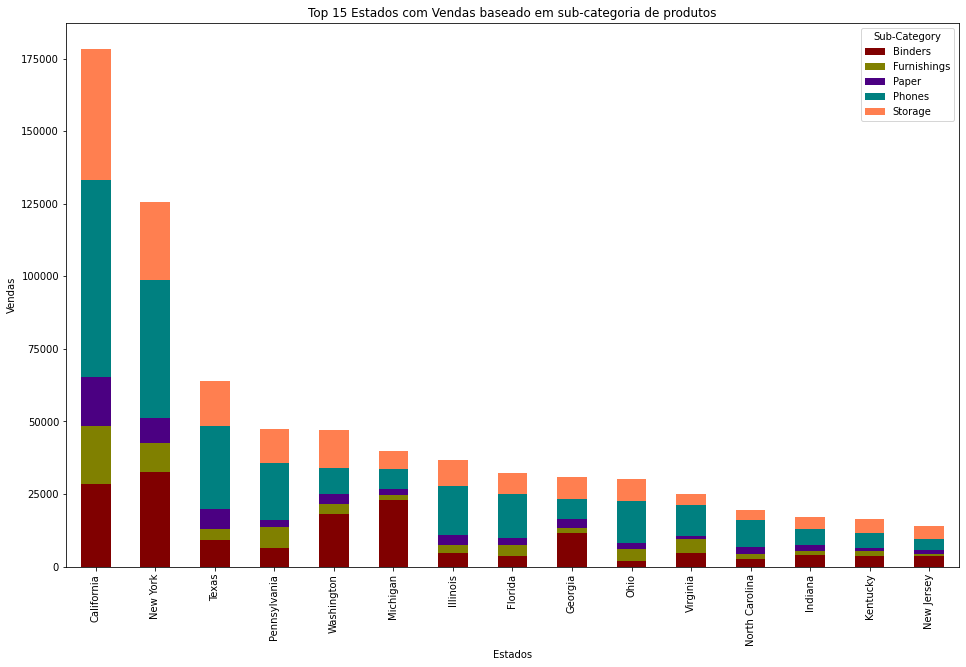

In [38]:
top15_agrup_cat.set_index('State').plot(kind='bar', stacked=True, color=['maroon', 'olive', 'indigo', 'teal', 'coral'], figsize=(16, 10))
plt.title('Top 15 Estados com Vendas baseado em sub-categoria de produtos')
plt.ylabel('Vendas')
plt.xlabel('Estados')

Muitos Estados tem uma grande tendência de comprar celulares. Uma outra tendência é a compra de fichários (binders).

Devemos ver os lucros dos Estados também

In [39]:
top15_agrup_cat_luc = top15_estados_subcat.groupby(['State', 'Sub-Category']).agg({'Profit':'sum'}).reset_index()
top15_agrup_cat_luc = top15_agrup_cat_luc.pivot(index='State', columns='Sub-Category', values='Profit').reset_index()
top15_agrup_cat_luc['Total'] = sum(top15_agrup_cat_luc[col] for col in sub_cat_top5)
top15_agrup_cat_luc = top15_agrup_cat_luc.sort_values(by='Total', ascending=False)
top15_agrup_cat_luc.drop(columns='Total', inplace=True)

top15_agrup_cat_luc

Sub-Category,State,Binders,Furnishings,Paper,Phones,Storage
0,California,10002.1537,5611.5606,7977.5395,6309.1197,7204.1372
8,New York,11096.0260,2931.4346,4023.0799,13399.1892,4338.2179
6,Michigan,11079.5050,435.3779,961.3904,1810.1694,940.4052
14,Washington,6061.8114,1054.8443,1570.4083,698.5820,1731.6766
2,Georgia,5717.3075,613.8861,1417.8822,1881.7586,1109.9142
13,Virginia,2268.9879,1024.6200,570.4312,2847.8657,545.2808
4,Indiana,1827.1562,180.7914,888.3797,1558.0269,555.2861
5,Kentucky,1740.0312,456.6605,502.2111,1406.3602,855.3874
7,New Jersey,1649.0788,311.3153,683.3578,1110.6172,779.1128
9,North Carolina,-2007.8254,153.0447,898.8403,860.4342,-86.2088


Text(0.5, 0, 'Estados')

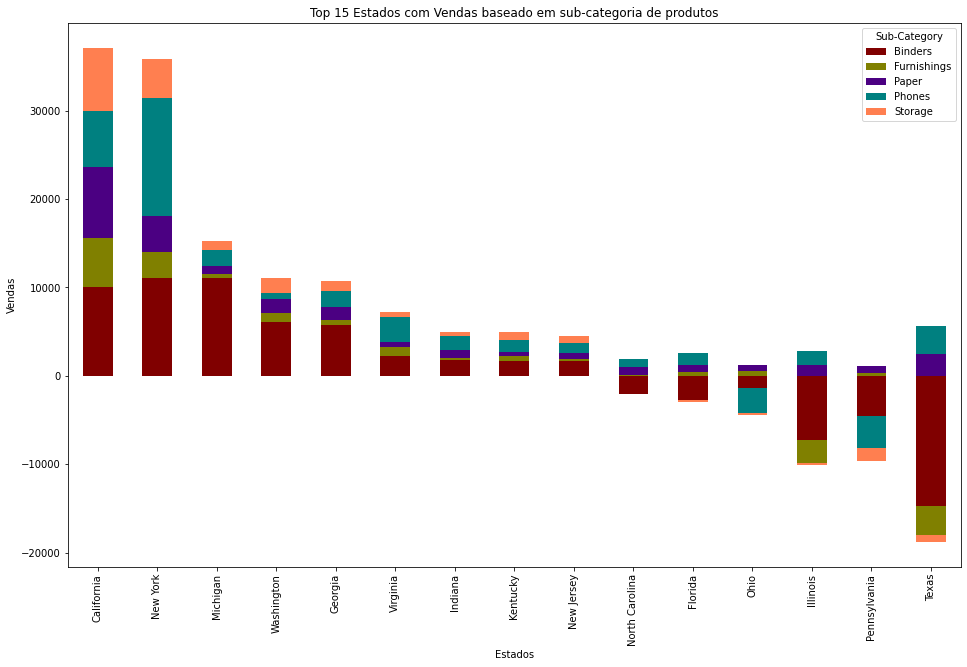

In [40]:
top15_agrup_cat_luc.set_index('State').plot(kind='bar', stacked=True, color=['maroon', 'olive', 'indigo', 'teal', 'coral'], figsize=(16, 10))
plt.title('Top 15 Estados com Vendas baseado em sub-categoria de produtos')
plt.ylabel('Vendas')
plt.xlabel('Estados')

Parece que um dos motivos pelo qual Texas tem prejuízo é justamente por conta os fichários. Possivelmente foram vendas com descontos que causaram o prejuízo.

Text(0.5, 1.0, 'Média de Vendas & Lucro Com o Tempo')

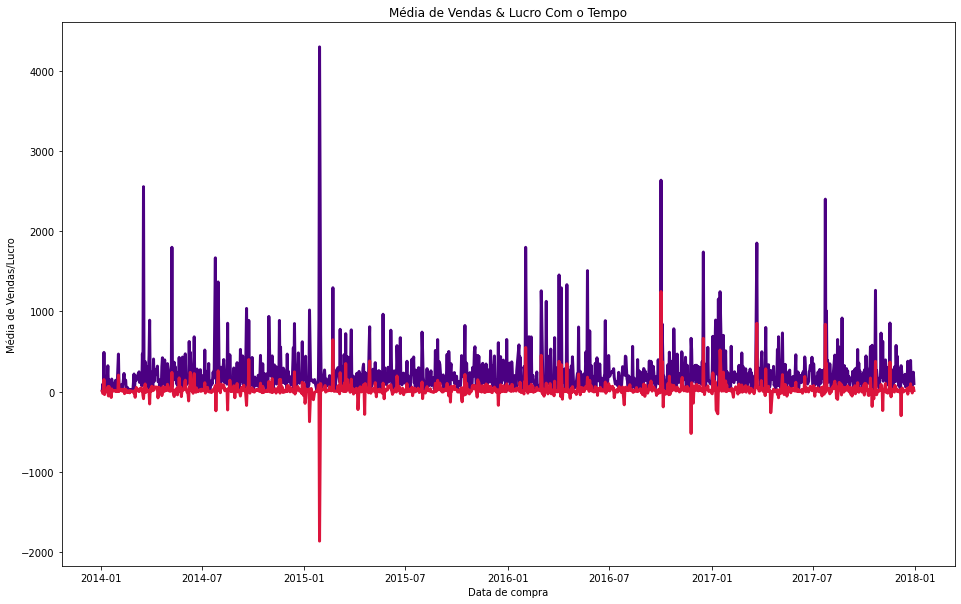

In [41]:
figure = plt.figure(figsize=(16,10))
tempo_dados = dados[['Order Date', 'Sales', 'Profit']].sort_values(by='Order Date', ascending=False)
tempo_dados_media = tempo_dados.groupby('Order Date').agg({'Sales':'mean', 'Profit':'mean'})

plt.plot(tempo_dados_media.index, tempo_dados_media['Sales'], color='indigo', label='Vendas', linewidth=3)
plt.plot(tempo_dados_media.index, tempo_dados_media['Profit'], color='crimson', label='Lucro', linewidth=3)
plt.xlabel('Data de compra')
plt.ylabel('Média de Vendas/Lucro')
plt.title('Média de Vendas & Lucro Com o Tempo')

Próximo ao começo de 2015, teve um enorme pico em vendas, mas também teve uma queda nos lucros. isso pode ter acontecido por conta de alguma queima de estoque ou algo similar.

## Conclusões

* Estados bem desenvolvidos como a California, Nova Iorque e outros tiveram uma alta em vendas, o que faz com que esses Estados levem uma alta porcentagem das vendas da Superstore Giant.
* Texas, apesar de ser um dos Estados como alta taxa de vendas, tem uma alta taxa de prejuízo também. Olhando a fundo, Texas tem dado muitos descontos em suas vendas, possivelmente acarretando uma queda nos lucros.
* Os Estados tem investido bastante em tecnologia e em suprimentos de escritório. Celulares tem feito as vendas subirem bastante e fichários também entram nessa questão.

Uma sugestão para aumentar um pouco mais as vendas seria investir em outros Estados, criar mais propagandas para a loja crescer nesses lugares.
Para resolver a questão das quedas em lucros de Texas, o ideal seria evitar descontos mais altos, a longo prazo eles podem gerar mais prejuízos, e manter os investimentos em tecnologia.
